
# Don't Be a Sucker
## Part 4
by Casey Durfee <csdurfee@gmail.com>     
Copyright 2025

## The Paradox of Mediocrity

If the lines are unbiased, then choosing your bets by flipping a coin would lead to winning 50% of the time. Losing substantially more or less than 50% is equally improbable, for a coin or a human. 

Imagine an "unlucky" bettor who lost 60% of the time. They would actually be the greatest of all time, because you could just take the opposite side of their bets and win 60% of the time.

If you assume the lines are fair, bad bettors don't go broke because they lose a lot. They go broke because they can't win often enough to beat the vig, or risk too much on each bet. They may do worse than flipping a coin, but not a lot worse. 

If a coin wins 50% of the time and somebody who is really into gambling also wins 50% of the time, then it's not really a game of skill. It's not a thing you can get better at by learning the lore and following the conventional wisdom.

Being bad at betting means still being right half the time. Being good at betting means being right 56% of the time. I'm not sure how you would tell the difference, except on large volumes of bets. Bettors who lose always seem to be able to generate a story that explains why the bet didn't win. I'll have a lot more to say about these stories. But first, some math.

### Handicapper vs Coin

Say that a skilled handicapper who wins 56% of the time decides on the bets they like, then they do another set of picks by flipping a coin. They track who gets more wins. There are usually around 7 NBA games a night. The vig is the standard -110.

1) What percent of the time will the handicapper get more the wins than coin? 
2) What percent of the time will the coin get more wins? 
3) What percent of the time will they tie?
4) What percent of the time does the coin have a winning day? 
5) What percent of the time does the handicapper have a winning day? 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

rng = np.random.default_rng(2718)

In [10]:
WIN_PCT = .56
FAIR_COIN = .5
NIGHTS = 100000
GAMES_A_NIGHT = 7

VIG = 1.1
MIN_WIN_PCT = .524 # breakeven win rate vs the vig

def handi_vs_coin(games, unit="days", emotional_support_bet=False):
    handi_wins = handi_losses = handi_ties = handi_winning_days = coin_winning_days = 0
    handi_overall_wins = handi_overall_losses = coin_overall_wins = coin_overall_losses = 0

    for x in range(NIGHTS):
        handicapper_record = [(rng.random() < WIN_PCT) for x in range(games)] # 1 for win, 0 for loss
        coin_record = [(rng.random() < FAIR_COIN) for x in range(games)]

        if emotional_support_bet:
            handicapper_record.append((rng.random() < FAIR_COIN))

        handi_day_wins = sum(handicapper_record)
        handi_day_losses = len(handicapper_record) - handi_day_wins
        handi_overall_wins += handi_day_wins
        handi_overall_losses += handi_day_losses

        coin_day_wins = sum(coin_record)
        coin_day_losses = len(coin_record) - coin_day_wins
        coin_overall_wins += coin_day_wins
        coin_overall_losses += coin_day_losses

        # who won the day -- the handicapper or the coin?
        if handi_day_wins > coin_day_wins:
            handi_wins += 1
        elif handi_day_wins == coin_day_wins:
            handi_ties += 1
        else:
            handi_losses += 1

        # who had a winning day (including cost of the vig)?
        if handi_day_wins > (MIN_WIN_PCT * games):
            handi_winning_days += 1
        if coin_day_wins > (MIN_WIN_PCT * games):
            coin_winning_days += 1 

    handi_profit_loss = handi_overall_wins - (VIG * handi_overall_losses)
    coin_profit_loss = coin_overall_losses - (VIG * coin_overall_losses)

    print(f"w/l/t%: {handi_wins/1000}-{handi_losses/1000}-{handi_ties/1000}")
    print(f"handicapper winning {unit}: {handi_winning_days/1000}%, coin winning {unit}: {coin_winning_days/1000}%")
    print(f"handicapper overall record: {handi_overall_wins}-{handi_overall_losses} ({100*handi_overall_wins/(handi_overall_wins+handi_overall_losses):.2f} %)")
    print(f"handicapper profit: {handi_profit_loss:.2f}")
    print(f"coin overall record: {coin_overall_wins}-{coin_overall_losses}")
    print(f"coin profit: {coin_profit_loss}")
    

In [11]:
handi_vs_coin(7)

w/l/t%: 48.678-31.064-20.258
handicapper winning days: 63.113%, coin winning days: 50.066%
handicapper overall record: 392557-307443 (56.08 %)
handicapper profit: 54369.70
coin overall record: 349969-350031
coin profit: -35003.100000000035


1. The handicapper beats the coin 49% of the time.
2. The coin beats the handicapper 31% of the time.
3. They tie 20% of the time.
4. The coin has a winning day 50% of the time.
5. The handicapper has a winning day 63% of the time.

Even though the coin has winning days half the time, it's still losing money long-term. Note that even though the handicapper is winning 56% of the time, they are having winning days 63% of the time, which might seem like free money.

### Getting Good Odds on Odd Goods

The fact that 7 is odd is significant. If there are an even number of bets per day, the proportion of winning days is going to change dramatically. Hitting 4/7 or better is going to be easier than 5/8 or better, or 4/6 or better. Almost half the time, someone who went 4/7 is going to lose that 8th bet and not have a winning day. They go 4-4 and lose .4 units to old Uncle Juice.

Let's see how this plays out over a range of games per day.

In [12]:
for x in range(3,9):
    print(f">>>>>>>>>> betting {x} games")
    handi_vs_coin(x)
    print("\n")

>>>>>>>>>> betting 3 games
w/l/t%: 40.153-29.006-30.841
handicapper winning days: 58.91%, coin winning days: 50.206%
handicapper overall record: 168144-131856 (56.05 %)
handicapper profit: 23102.40
coin overall record: 150409-149591
coin profit: -14959.100000000006


>>>>>>>>>> betting 4 games
w/l/t%: 43.031-29.878-27.091
handicapper winning days: 40.477%, coin winning days: 31.174%
handicapper overall record: 223649-176351 (55.91 %)
handicapper profit: 29662.90
coin overall record: 199591-200409
coin profit: -20040.900000000023


>>>>>>>>>> betting 5 games
w/l/t%: 45.234-30.491-24.275
handicapper winning days: 61.221%, coin winning days: 49.956%
handicapper overall record: 279995-220005 (56.00 %)
handicapper profit: 37989.50
coin overall record: 249929-250071
coin profit: -25007.100000000035


>>>>>>>>>> betting 6 games
w/l/t%: 47.062-30.956-21.982
handicapper winning days: 46.232%, coin winning days: 34.368%
handicapper overall record: 335905-264095 (55.98 %)
handicapper profit: 4540

As the sample size increases, the handicapper wins more often against the coin. There is no such thing as luck, only small sample size.

The odd number of days is signficant. Both the handicapper and the coin look more skilled (gauged by number of winning days) when taking an odd number of bets. Even at 3 games a day, the skilled bettor is winning 59% of the days.

Let's look at a 49 game sample, roughly a week's worth of games, and 201 games, roughly a month.

In [13]:
handi_vs_coin(49, unit="weeks")

w/l/t%: 69.16-24.156-6.684
handicapper winning weeks: 71.538%, coin winning weeks: 38.97%
handicapper overall record: 2744597-2155403 (56.01 %)
handicapper profit: 373653.70
coin overall record: 2451257-2448743
coin profit: -244874.30000000028


The coin is still beating the bettor 24% of the time, and having winning weeks 39% of the time. Even at this sample size, there's a significant difference between 49 games and 48 as far as % winning days.

In [14]:
handi_vs_coin(48, unit="weeks")

w/l/t%: 68.505-24.598-6.897
handicapper winning weeks: 65.613%, coin winning weeks: 33.546%
handicapper overall record: 2686534-2113466 (55.97 %)
handicapper profit: 361721.40
coin overall record: 2402055-2397945
coin profit: -239794.5


here's roughly a month of games. the coin is still putting up winning months 24% of the time, while losing massively.

In [15]:
handi_vs_coin(200, unit="months")

w/l/t%: 87.568-10.48-1.952
handicapper winning months: 85.654%, coin winning months: 26.322%
handicapper overall record: 11197897-8802103 (55.99 %)
handicapper profit: 1515583.70
coin overall record: 9999296-10000704
coin profit: -1000070.4000000004


The handicapper still has losing months 16% of the time on 200 bets. The coin beats the handicapper 10% of the months, and has a winning record 26% of the months.

There's a nugget of betting psychology in this. If you bet every day and wanted to optimize for the number of days per week you have a winning day, you should take an odd number of bets. Even a coin can have winning days half the time.

No, this isn't one weird trick that statisticans hate. It all comes out in the wash. None of this changes the overall winning percentage or whether the bettor makes money in the long run, as you can see.

### The emotional support bet

Say the handicapper from the above example has 6 bets they want to make. Each will win 56% of the time. They want to have as many winning days as possible. What if they took a seventh bet by flipping a coin?

In [16]:
handi_vs_coin(6)

w/l/t%: 47.071-30.707-22.222
handicapper winning days: 46.158%, coin winning days: 34.215%
handicapper overall record: 335753-264247 (55.96 %)
handicapper profit: 45081.30
coin overall record: 299516-300484
coin profit: -30048.400000000023


In [17]:
handi_vs_coin(6, emotional_support_bet=True)

w/l/t%: 58.232-22.309-19.459
handicapper winning days: 61.308%, coin winning days: 34.231%
handicapper overall record: 386707-313293 (55.24 %)
handicapper profit: 42084.70
coin overall record: 299667-300333
coin profit: -30033.300000000047


TODO: fix these numbers

In [18]:
39031.31 / 46885.20

0.832486797539522

In [19]:
(60.895 - 46.312)/ 46.312

0.3148859906719642

The strategy works! The bettor's winning percent drops to 55%, which cuts into profits but increases the number of winning days by 30%.


### Our pal, the binomial distribution
Why are 63% of days winning days for the skilled handicapper? Shouldn't it be 56%, to match their win rate? Where are those "free" winning days coming from? Shouldn't the coin have losing days more than 50% of the time with the vig figured in?

These might seem like silly, obvious questions, or they might not. Either way, stick with me. I swear there's a point to this.

The number of winning bets in a week comes from something called the binomial distribution. It tells us the probability of a certain number of wins out of a number of trials, given a certain rate of success. If you flip a fair coin 10 times, how likely is it that you get more than 7 heads?

The binomial is the same thing as what I was approximating above -- flipping a coin with the `rng.random()` function and adding up the binary results.

First, 7 coin flips (p=.5). the x axis is number of successes and the y axis is the probability of that number.

<BarContainer object of 8 artists>

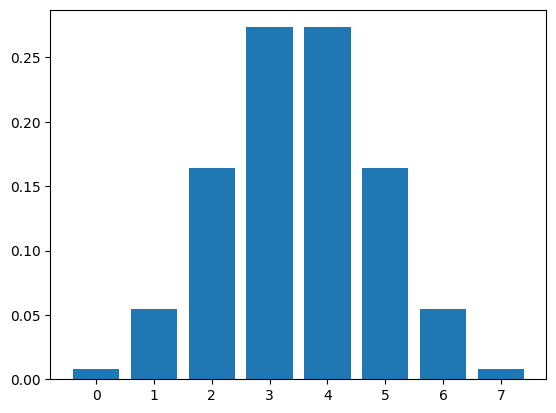

In [20]:
coin = scipy.stats.binom(GAMES_A_NIGHT, FAIR_COIN)

coin_df = pd.DataFrame({
    'x': [x for x in range(GAMES_A_NIGHT+1)],
    'y': [coin.pmf(x) for x in range(GAMES_A_NIGHT+1)]

})
plt.bar(coin_df.x, coin_df.y)


Notice how nice and symmetrical it is. going 3-4 and 4-3 are equally likely. The mean is clearly 3.5

What about the bettor, with a 56% chance of winning each bet??

<BarContainer object of 8 artists>

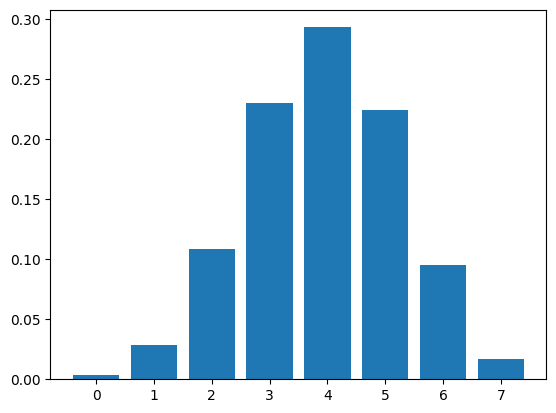

In [21]:
bettor = scipy.stats.binom(GAMES_A_NIGHT, WIN_PCT)

binomial_df = pd.DataFrame({
    'x': [x for x in range(GAMES_A_NIGHT+1)],
    'y': [bettor.pmf(x) for x in range(GAMES_A_NIGHT+1)]

})
plt.bar(binomial_df.x, binomial_df.y)

The curve gets shifted to the right a little bit and now it's no longer symmetrical. Now the most likely outcome is 4. Since 4/7=57.1%, that makes sense. 2 and 6 are now roughly equally likely, instead of 2 and 5. though 2 is more likely than 6, and 3 is more likely than 5. 

If you think about it, it can't be symmetrical anymore. Our bell curve got shifted to the right because we increased the winning percentage. 

The distribution people think of, if they have ever thought about distributions, is the normal distribution.

We can plot the equivalent normal distribution over the top of the binomial outcomes. You can see, it's pretty close.  But there are some problems. 
1. the normal distribution is symmetrical and the binomial distribution isn't. 
2. the normal distribution has an infinite range -- for instance, it would give a non-zero chance to getting 8 heads in 7 coin flips. 
3. The normal distribution is continuous, which means it can give us the probability of getting 3.3 heads in 7 coin flips.

<BarContainer object of 8 artists>

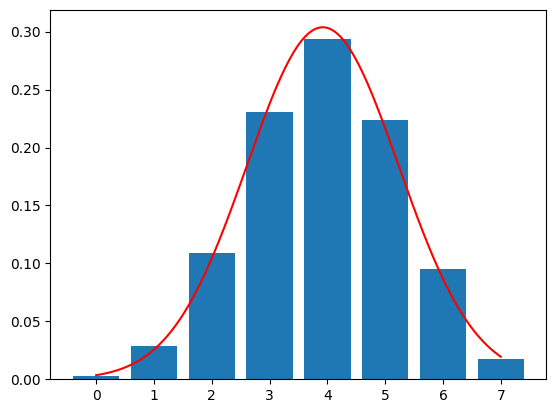

In [22]:
mean = 7 * .56
sd = np.sqrt(7 * .56 * (1-.56))

x = np.linspace(0, 7, 200)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sd), color="r")
plt.bar(binomial_df.x, binomial_df.y)

Just looking at the graph above, you can probably convince yourself that if we had a huge number of trials, the binomial distribution will look more and more like the normal distribution. But there can be significant differences when the number of outcomes is small.

### Are you normal?

I think we have a cognitive bias towards thinking everything is a normal distribution (the classic bell curve), where the left tail and right tail are the same.  

That's true for average folks and stats newbies alike. It's great! You don't have to remember the difference between left-skewed and right-skewed, for one thing. And the equation for the normal distribution has $\pi$ in it. Yeah, it's your old buddy from middle school geometry class! Small world, isn't it?

The binomial distribution can be approximated by the normal distribution (or the poisson) under certain conditions. Approximations are fine when the number of trials are large, but prop bets are usually based on a fairly small number, where the difference can matter. Life is a game of inches and the inches are all around you.

### Being binomial doubles the chances of misunderstanding
Prop bets are where instead of betting on a team, you bet on an individual player's stats. For instance, whether they will get more or less than 7.5 rebounds. In order to understand these bets, we have to model them as a binomial distribution. They're not going to be symmetrical, so naive statistical intuition and the normal distribution will fail us.

To model it as a binomial, we determine the probability a player gets a rebound on the average possession (the rebounding rate), and the number of possessions the player is in the game for. 

What would that mean if you're thinking about taking a prop bet like Giannis over/under 9 rebounds? Just from a geometry standpoint, if the curve isn't symmetrical, one side will be a slightly better deal. Is it the over or the under?

That's actually a trick question. I showed you a binomial distribution that was heavier on the left (making the under a possibly better value), but they can be heavier on the right as well.

Let's say we're looking at a prop bet of CJ McCollum over 3.5 rebounds. 

![cj mccollum prop bet from covers.com](img/cj.png)

We can pull his rebounds per 100 posessions rate from basketball-reference, then estimate the number of possessions by comparing it to his rebounds per game stat. Obviously, this is an extremely rough model, but we gotta start somewhere.

Notice this time that the binomial distribution is a little taller on the right -- 4 bigger than 2, 5 bigger than 1, etc. You have to squint pretty hard to see it as a normal distribution, right?

<BarContainer object of 10 artists>

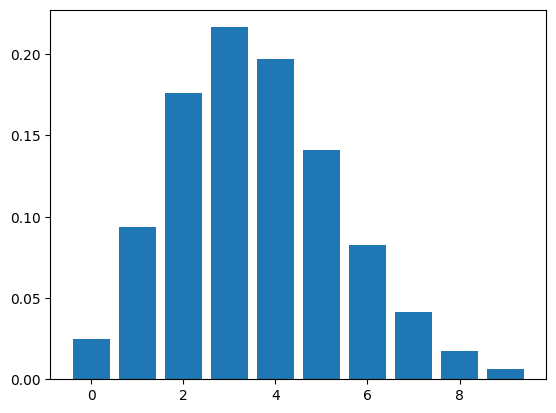

In [23]:
reb_per_100 = 5.3 # per 100 possessions numbers from bbref
reb_per_possession  = reb_per_100/ 100 
reb_per_game = 3.6
poss_per_game = round(100 * (reb_per_game/reb_per_100))

cj2 = scipy.stats.binom(poss_per_game, reb_per_possession)


cj2_df = pd.DataFrame({
    'x': [x for x in range(0,10)],
    'y': [cj2.pmf(x) for x in range(0,10)]

})
plt.bar(cj2_df.x, cj2_df.y)

the mean matches his rebounds per game, as expected.

In [24]:
cj2.mean()

np.float64(3.604)

In [25]:
# probability of going under
prob_under = sum(cj2_df[cj2_df.x < 3.5].y)
prob_under

0.5108777749415454

Based on this simple model, there's a 51.1% chance of it going under (3 or fewer rebounds). If it was 50% then the fair price would be be the same regardless of whether you take the over or the under, but if it's imbalanced, the more likely side should get a smaller payout when they do win. This is sort of like paying a higher vig on the bet. You have to put up more money than you win.

We can convert between the probability and the American style money line. In this case, a no-vig price for the under would be -104, and correspondingly +104 for the over.

In [47]:
def convert_prob_to_money_line(proba):
    
    if proba > .5:
        money_line = -100 * (proba/(1-proba))
    else:
        money_line = 100 * ((1-proba) / proba)
    return round(money_line)


convert_prob_to_money_line(prob_under)

-104

So, under 3.5 rebounds at -105 is a pretty fair line, based on our assumptions. We'd still lose money over the long run, though, because of the tiny difference between -104 and -105. If the line were instead +105 for the under, it would be a bet we could expect to make money on.

Even small changes to our assumptions can drastically change how good of a deal the bet is. In this game, he was playing against Chicago, which is a very fast paced team.  If we decided that CJ will play 10% more possessions than usual, due to faster pace, or a teammate being injured, or some other factor, the model changes:

In [1]:
reb_per_100 = 5.3 # per 100 possessions numbers from bbref
reb_per_possession  = reb_per_100/ 100 
reb_per_game = 3.6

# TODO: make this code clearer! only change poss/game
poss_per_game = round(1.1 * 100 * (reb_per_game/reb_per_100)) # increase number of possessions by 10%

cj3 = scipy.stats.binom(poss_per_game, reb_per_possession)


cj3_df = pd.DataFrame({
    'x': [x for x in range(0,10)],
    'y': [cj3.pmf(x) for x in range(0,10)]

})
plt.bar(cj3_df.x, cj3_df.y)

NameError: name 'scipy' is not defined

In [28]:
new_proba = sum(cj3_df[cj3_df.x < 3.5].y)

new_proba

0.43313887452989086

In [29]:
convert_proba(new_proba)

131

Under these assumptions, the fair price for under 3.5 rebounds would be +131, making the -105 offer a terrible deal.

To rationally be betting props you'd have to be doing all this binomial nonsense to figure out if the vig is fair or not on every single bet. It's a multiple step calculation process with lots of assumptions. 

I'd guess there are apps and websites that can help, but it's still betting on how well you did your math homework more than it is betting on sports.

It's not really a bet on whether CJ McCollum will have a good game tonight. He played poorly in the last game but got 4 rebounds, so the over would have paid. McCollum got 38 points the game before that, and only got 3 rebounds. He scored 50 points a month ago and got 3 rebounds.

It's really a bet on whether the player gets more minutes than average, the team plays at a certain pace, what the opponent's rebounding rate is, etc.

It seems like a much more variable thing to bet on than who wins versus the spread.

If you're a sicko like me, that could be fun, but do you think people are doing this big math problem every time they place a prop bet? 

Of course not. They're probably just taking the over regardless of price, because overs are more fun. Rooting against CJ McCollum getting his 4th rebound at the end of a meaningless game where he already scored 50 points is pathological.

The sportsbooks aggressively push overs as well. Here's a screenshot from the ESPN Bet sportsbook:

![a screen only offering over prop bets](img/prop_overs2.png)

This is their main NBA betting page on 1/30/2025. They offer the ability to pick the overs on prop bets from that page, but not the unders. You have to dig deep if you want to take the unders. I think they have to legally allow bets on both sides, but they sure don't make it easy.

FanDuel does the same thing. When I visit their site, I'm directed to the "parlay lounge" from the homepage, which offers a bunch of premade parlays that are all overs. You can't change the legs of those parlays to be unders, you can only change which player you're taking the over on.

To bet the under, you have to pick the game in question, then select "player points", then scroll down through several pages of over-only bets.

![fanduel](img/fanduel.png)

If this is your first day in a capitalist country, welcome. If not, you should be suspicious about which side is a better value if they're only pushing one side of these bets. 

It's a small sample size, but all three of the suggested prop bets from ESPN bet lost, and you would end up paying as much vig on 3 bets as if you lost 5 bets at -110 or 10 bets at -105.

The vig on prop bets is high enough on these bets that I don't know if savvy bettors could make money through arbitrage opportunities, and keep the lines honest. What I've seen is that when a line on a prop bet moves, the books also increase the size of the vig to a point where neither side could make money.

The smaller the counts, the crazier the vig. Here's one for Brook Lopez over/under 1.5 assists.

![brook lopez assists](img/brolo.png)

+155/-190 isn't even close to 50/50. When you're betting the point spreads, no bet is really all that crazy since both sides should win about 50% of the time. But if the odds are imbalanced, that changes both the math and psychology of betting. More on that later.

We can convert from American-style lines to probabilities of winning.

In [3]:
def convert_line(line):
    if line < 0:
        return abs(line)/(abs(line)+100)
    else:
        return 100/(100+line)

In [45]:
convert_line(155)

0.39215686274509803

In [39]:
convert_line(-190)

0.6551724137931034

The sum of these two probabilities is greater than one, which is how the sportsbook makes money. For instance, over 1.5 +155 bet might only win 35% of the time. However, it is priced like it will win 39% of the time. That difference is essentially the vig - the percent of the amount bet that the sportsbook will have at the end of the night, assuming equal amounts of money on both sides.

This is sometimes called "the overround".

Bet365 has the line at +155/-190, which is roughly equivalent to a -110 vig.

In [40]:
convert_line(155) + convert_line(-190) - 1

0.047329276538201404

However, Caesar's has it at +139/-192, which is much more lucrative for the sportsbook.

In [41]:
convert_line(139) + convert_line(-192) - 1

0.0759442884163466

This makes it equivalent to a bet at -115 vig.

$winPct - ((1-winPct) * vig) = -7.59$

$ 50 - (50 * vig) = -7.59$

$ vig = 57.59/50 = 1.15$

## Devigging

What side of the bet get applied to, though? the sportsbooks decide what the fair (no-vig) price is, and then add their cut on top of that. So the fair price might be +180, which goes to +155 when the vig is added on top.

It would be nice to "de-vig" the price, to get the true estimated probability. For one thing, this might present arbitrage opportunities. If a sportsbook is really good at handicapping, a gambler could de-vig their prices and assume that's the best estimate of the true probability. Then the gambler could look for other sportsbooks where the line is significantly different, and make a bet with positive expectated value.

It turns out it's hard to determine the best way to de-vig. The most common way of de-vigging ends up deciding that it's the underdog that pays the vig, known as the favorite-longshot bias. The sportsbooks make the underdog a slightly less better value than the "overcat". I'm not sure I'm totally sold; I think [this article](https://www.football-data.co.uk/blog/favourite_longshot_bias_revisited_again.php) presents a good argument against it.

My own personal take would be they're probably adding the vig on the side they think is going to get more action, or which side is less price-sensitive (casual bettors don't care about the difference between -110 and -115). Sometimes that could be an underdog, sometimes it could be the favorite. 

The sportsbooks know what teams and players people like to bet on. They have a huge amount of data about their users, and hand-create parlays with cutesy names:

![prop bet name with greengrocer's apostrophe](img/heros.png)

Why wouldn't they use their knowledge of crappy sports bettors' habits to maximize the amount of vig people are paying? Then use dark patterns to encourage people to take those bets?

Clearly somebody creates those parlays every day. I think I'd be good at that job, though I'd be tempted to do the "Cards Against Humanity" versions. Gradey Dick would be in so many parlays, man. 

I have some safe for work ideas, too. All unders, to provide a little balance.

* "Chess Masters": Lebron "King" James, Stephon Castle, Trevelin Queen
* "White Boy Spring": Nikola Jokic/Christian Braun/Franz Wagner
* "Good Eaters": Zion Williams, Luka Doncic, Guerschon Yabusele
* "There Are Two Many Jalens These Days, Please Eliminate Two": Jaylen Brown, Jaylen Wells, Jalen Brunson, Jalen Green, Jalen Williams, Jalen Johnson, Jalen Suggs

By the way, that bet is shit. Just going off the home records of those teams, the fair price should be +2994. All three teams are playing against slightly above average opponents (Lakers, Timberwolves, Hawks), so it's a lazy way to estimate the price, but it's not unfair. It might even be underestimating it a bit, if you think their opponents are playing better than their records.

Based on my estimate, on the 3% chance you do win, you basically have to turn around and give most of it back to the bookie for the privilege of taking the bet.

In [ ]:
# this is from january 30th, 2025.

# washington are 4-18 at home
# utah are 5-20 at home
# clebeland is 24-3
# their opponents tonight are all average, so using the home records as probability estimate isn't crazy

# actual money lines were +280 wizards, +196 jazz, -600 clebeland
payout = 1370

true_odds = (4 / 22) * (5/25) * (24/27)

print(f"est true odds: {true_odds}")

ml = convert_prob_to_money_line(true_odds)

print(f"fair bet: risk 100 to win ${ml}")
print(f"bookie's cut ${ml - payout}")
print(f"your cut: ${payout}")
print(f"sucker tax: {100 * (ml-payout)/ml:.2f}%")

est true odds: 0.03232323232323232
fair bet: risk 100 to win $2994
bookie's cut $1624
your cut: $1370
sucker tax: 54.24%


the money lines for those games were +280/+196/-600. we can multiply those together to get another estimate of the "fair" money line. (Why did I put "fair" in scare quotes?)

In [67]:
odds_based_on_mls = convert_line(280) * convert_line(196) * convert_line(-600)

print(f"odds based on money lines: {odds_based_on_mls}")
print(f"supposedly fair money line: ${convert_prob_to_money_line(odds_based_on_mls)}")

odds based on money lines: 0.07620402357244462
supposedly fair money line: $1212


[TODO: fix this, I actually don't know if the spread chart is accurate for 2025 NBA games.]

Wait, they're offering a bet with a fair price of $1212 for $1370? Isn't that actually a good deal? Wouldn't you have to be crazy *not* to offer it to you? Am I lying to you? 

No! The original money lines all have vig on them, so we can't multiply them together.  We can use the same moneyline-spread conversion chart we've been using to get the fair (no vig) money lines.

Spreads were: Wizards +9, Jazz +6, Cavs -10.5.    
Corresponding no-vig ML prices (based on the chart) are: +459, +251, -709

In [92]:
prob_based_on_spreads = convert_line(459) * convert_line(251) * convert_line(-709)
ml2 = convert_prob_to_money_line(prob_based_on_spreads)

print(f"prob based on spreads: {prob_based_on_spreads}")
print(f"no-vig money line, based on spreads: ${ml2}")
print(f"bookie's cut ${ml2 - payout}")
print(f"your cut: ${payout}")
print(f"sucker tax: {100 * (ml2-payout)/ml2:.2f}%")


prob based on spreads: 0.044666177682269013
fair money line, based on spreads: $2139
bookie's cut $769
your cut: $1370
sucker tax: 35.95%


Based on that estimation, the sucker tax is only 36% instead of 52%, but that's still crazy.

Note that the actual Cavs moneyline was -600 and the no-vig price based on spread was -709. So the favorite was a bargain, and the underdog a bad bet.

How much of a bargain? Well, the bet wins around 7/8 of the time, but it's priced like it wins 6/7 of the time and loses 1/7 of the time.

In [105]:
# chances of winning minus chances of losing
(convert_line(600) * convert_line(-709)) - (convert_line(-600) * convert_line(+709))

0.019247748543174972

So there's a maybe , assuming the spread is perfectly fair. It's possible that the money line might be a slightly better value on heavy favorites. I'm not going to draw too many conclusions from one data point.

Speaking of which, the Cavs won by 22, Utah lost by 25, and Washington lost by 38. I know that's hindsight bias, but my original estimate of the parlay using home records was closer to the true outcome than the money lines set by the sportsbooks.

## No Futures For You

One popular type of bet is the futures bet. These are often novelty bets on pop culture, such as who will win the Oscars.

![oscars futures bet](img/overround.png)

The overround on these bets is huge. Here it's 25%.

In [ ]:
oscar_lines = [-150, 125, 850, 1600, 2200]

oscar_overround = sum(map(convert_line, oscar_lines))


print(oscar_overround)

1.252009392620511


There are also sports futures bets, for example who will win the NBA Championship this year.

The overround is roughly the same.

![nba futures](img/nbaoverround.png)

In [6]:
nba_lines = [200,210,550,850,1200,1600,1800,3300,4500,5000,5500,6600,8000,12500,20000,
             25000,25000,25000,30000,40000,50000,75000,100000,100000,100000,100000]

sum(map(convert_line, nba_lines))

1.2572918269741917

If you limit it to just the top 6 teams, the overround is 5%, like a normal bet against the spread or the money line.

In [10]:
nba2 = [200,210,550,850,1200,1600]
sum(map(convert_line, nba2))

1.050769896570356

The longshots are really what make these crazy profitable, and low risk for the sportsbook to offer. On a top-heavy sport like NBA, they're basically just free money.

That doesn't mean the top teams are fairly priced, though! Lakers +850 seems like a sucker play. The books don't have to worry about giving accurate odds on real contenders if they can get enough money on longshots with zero prayer of winning, and public teams like the Lakers.

As an NBA fan, the Cavs at +550 seems underpriced *relative* to other teams, but that doesn't make it a value. There are no checks and balances on the prices of these future bets, no way for the wisdom of crowds to intervene and make things fair. 

The books can set the overround as high as they want. As long as people will still take the bets, why do the lines on futures bets have to be fair? I might be happy to bet against the Lakers winning the championship, but I can't. These are one sided bets.

There's also an issue with leaving money with the casino for months. If you take an NBA futures bet at the beginning of the season, the sportsbook holds onto your money for 6 months. If you left it with a bank, they'd pay you interest. A sportsbook surely won't. That might not be much, but it is another little vig they get you to pay.